### **Keypoint Detection**

### Sift

In [12]:
import cv2 as cv
import numpy as np
import argparse
from matplotlib import pyplot as plt

TEST_IMG = "test.jpeg"

In [103]:
def split_img(img, rows, cols, inter_k):
    splits = []
    m_size = img.shape[0]
    n_size = img.shape[1]
    add_n = n_size % cols

    for i in range(rows):
        row = []
        for j in range(cols):
            last = j == cols - 1
            first = j == 0

            start = j * (n_size // cols) - (not first) * inter_k
            end = (j + 1) * (n_size // cols) + (not last) * inter_k
            
            row.append(img[:, start:end + last * add_n])    
        splits.append(row)
            
    return splits

In [104]:
src = cv.imread(TEST_IMG)

if src is None:
    print('Could not open or find the image:', TEST_IMG)
    exit(0)
img = src.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

r_split = 1
c_split = 3
splits = split_img(gray, r_split, c_split, 200)

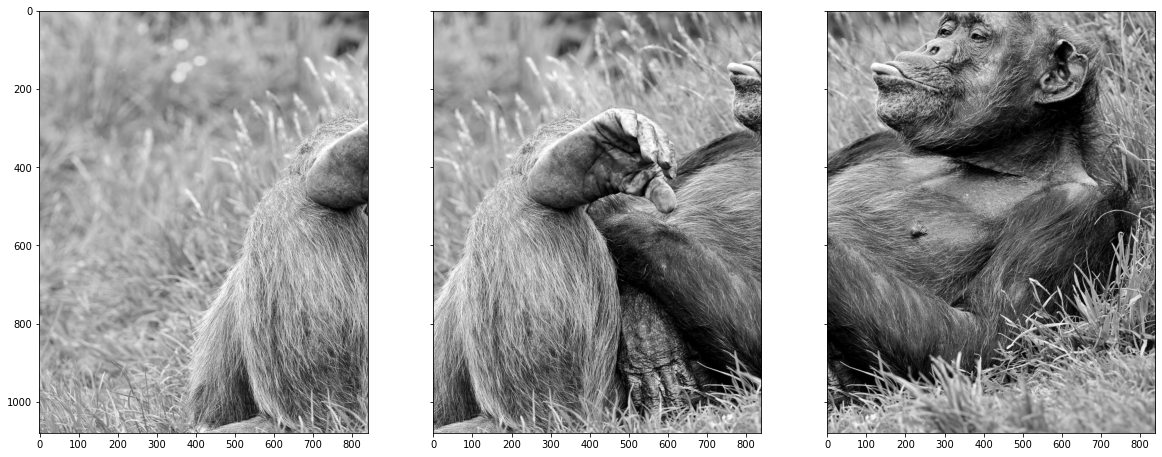

In [107]:
def show_splits(splits, **kwargs):
    rows = len(splits)
    cols = len(splits[0])
    fig, axes = plt.subplots(
        rows, cols, sharex=True, sharey=True, figsize=(20,10)
    )

    for i in range(rows):
        for j in range(cols):
            if rows == 1:
                axes[j].imshow(splits[i][j], **kwargs)
            else:
                axes[i,j].imshow(splits[i][j], **kwargs)

show_splits(splits, cmap='gray')
# plt.figure(figsize = (20,10))
# plt.imshow(splits[0][0], cmap='gray')

In [ ]:

sift = cv.SIFT_create()
keypoints = sift.detect(gray)

cv.drawKeypoints(gray, keypoints, img)


# img = cv.drawKeypoints(
#     gray, keypoints, img,
#     flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
# )

plt.figure(figsize = (20,10))
plt.imshow(img[:,:,::-1])